# Import Library


In [1]:
# Import library
import pandas as pd
import numpy as np
from zipfile import ZipFile
import tensorflow as tf_lib
from tensorflow import keras
from tensorflow.keras import layers
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import train_test_split

# Load Dataset

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
chess = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Projek Akhir Machine Learning Terapan /datasets/games.csv")

chess.head()

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply
0,TZJHLljE,False,1.504210e+12,1.504210e+12,13,outoftime,white,15+2,bourgris,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,Slav Defense: Exchange Variation,5
1,l1NXvwaE,True,1.504130e+12,1.504130e+12,16,resign,black,5+10,a-00,1322,skinnerua,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,Nimzowitsch Defense: Kennedy Variation,4
2,mIICvQHh,True,1.504130e+12,1.504130e+12,61,mate,white,5+10,ischia,1496,a-00,1500,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,C20,King's Pawn Game: Leonardis Variation,3
3,kWKvrqYL,True,1.504110e+12,1.504110e+12,61,mate,white,20+0,daniamurashov,1439,adivanov2009,1454,d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...,D02,Queen's Pawn Game: Zukertort Variation,3
4,9tXo1AUZ,True,1.504030e+12,1.504030e+12,95,mate,white,30+3,nik221107,1523,adivanov2009,1469,e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...,C41,Philidor Defense,5


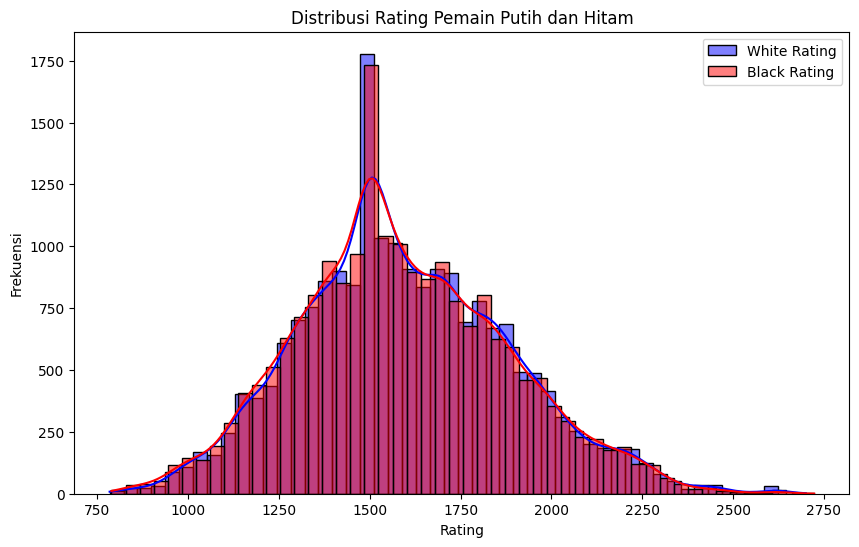

In [4]:
# Visualisasi distribusi rating
plt.figure(figsize=(10, 6))
sns.histplot(chess['white_rating'], bins=50, kde=True, color='blue', label='White Rating')
sns.histplot(chess['black_rating'], bins=50, kde=True, color='red', label='Black Rating')
plt.title('Distribusi Rating Pemain Putih dan Hitam')
plt.xlabel('Rating')
plt.ylabel('Frekuensi')
plt.legend()
plt.show()

# EDA

In [5]:
chess.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20058 entries, 0 to 20057
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              20058 non-null  object 
 1   rated           20058 non-null  bool   
 2   created_at      20058 non-null  float64
 3   last_move_at    20058 non-null  float64
 4   turns           20058 non-null  int64  
 5   victory_status  20058 non-null  object 
 6   winner          20058 non-null  object 
 7   increment_code  20058 non-null  object 
 8   white_id        20058 non-null  object 
 9   white_rating    20058 non-null  int64  
 10  black_id        20058 non-null  object 
 11  black_rating    20058 non-null  int64  
 12  moves           20058 non-null  object 
 13  opening_eco     20058 non-null  object 
 14  opening_name    20058 non-null  object 
 15  opening_ply     20058 non-null  int64  
dtypes: bool(1), float64(2), int64(4), object(9)
memory usage: 2.3+ MB


In [6]:
print("Banyaknya permainan: ", len(chess.id.unique()))
print("Banyaknya pemain putih: ", len(chess.white_id.unique()))
print("Banyaknya pemain hitam: ", len(chess.black_id.unique()))
print("Banyaknya opening: ", len(chess.opening_name.unique()))

Banyaknya permainan:  19113
Banyaknya pemain putih:  9438
Banyaknya pemain hitam:  9331
Banyaknya opening:  1477


In [7]:
# Mengecek statistik data
chess.describe()

,created_at,last_move_at,turns,white_rating,black_rating,opening_ply
count,2.005800e+04,2.005800e+04,20058.000000,20058.000000,20058.000000,20058.000000
mean,1.483617e+12,1.483618e+12,60.465999,1596.631868,1588.831987,4.816981
std,2.850151e+10,2.850140e+10,33.570585,291.253376,291.036126,2.797152
min,1.376772e+12,1.376772e+12,1.000000,784.000000,789.000000,1.000000
25%,1.477548e+12,1.477548e+12,37.000000,1398.000000,1391.000000,3.000000
50%,1.496010e+12,1.496010e+12,55.000000,1567.000000,1562.000000,4.000000
75%,1.503170e+12,1.503170e+12,79.000000,1793.000000,1784.000000,6.000000
max,1.504493e+12,1.504494e+12,349.000000,2700.000000,2723.000000,28.000000


In [8]:
# Mengecek apakah ada missing values
chess.isnull().sum()

,0
id,0
rated,0
created_at,0
last_move_at,0
turns,0
victory_status,0
winner,0
increment_code,0
white_id,0
white_rating,0


In [9]:
# mengecek apakah ada yang duplicate
chess['id'].duplicated().sum()

945

In [10]:
# Menemukan baris yang duplikat berdasarkan kolom 'id'
duplikat = chess[chess.duplicated(subset=['id'])]
print(duplikat)

             id  rated    created_at  last_move_at  turns victory_status  \
950    XRuQPSzH   True  1.503580e+12  1.503580e+12     50         resign   
1794   x1Svcl0P   True  1.499820e+12  1.499830e+12     59           mate   
1830   wgIHzqDo   True  1.499710e+12  1.499710e+12    113           mate   
2554   JrFxlGZo  False  1.489330e+12  1.489330e+12     78           mate   
2556   ezKACesj  False  1.488840e+12  1.488840e+12     51           mate   
...         ...    ...           ...           ...    ...            ...   
20013  Uk0pZCRR   True  1.499532e+12  1.499541e+12     95         resign   
20014  ZhZm1ol9   True  1.498871e+12  1.498879e+12    109           draw   
20015  fpqjttDx   True  1.497663e+12  1.497664e+12     42         resign   
20016  lzPgCJCS   True  1.497660e+12  1.497663e+12    102         resign   
20017  p391pBJv   True  1.497647e+12  1.497654e+12     97         resign   

      winner increment_code         white_id  white_rating         black_id  \
950    b

In [11]:
# Mennghapus data permainan yang sama
chess = chess.drop_duplicates(subset=['id'])
chess.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19113 entries, 0 to 20057
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              19113 non-null  object 
 1   rated           19113 non-null  bool   
 2   created_at      19113 non-null  float64
 3   last_move_at    19113 non-null  float64
 4   turns           19113 non-null  int64  
 5   victory_status  19113 non-null  object 
 6   winner          19113 non-null  object 
 7   increment_code  19113 non-null  object 
 8   white_id        19113 non-null  object 
 9   white_rating    19113 non-null  int64  
 10  black_id        19113 non-null  object 
 11  black_rating    19113 non-null  int64  
 12  moves           19113 non-null  object 
 13  opening_eco     19113 non-null  object 
 14  opening_name    19113 non-null  object 
 15  opening_ply     19113 non-null  int64  
dtypes: bool(1), float64(2), int64(4), object(9)
memory usage: 2.4+ MB


# Data Preprocessing

## Filter by rating range

In [12]:
chess_rating = (
    ((chess['white_rating'] >= 1500) & (chess['black_rating'] <= 2200)) &
    ((chess['black_rating'] >= 1500) & (chess['white_rating'] <= 2200))
)
chess_data = chess[chess_rating].copy()
chess_data.head()

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply
61,ztpC1S2c,True,1.503970e+12,1.503970e+12,49,resign,white,8+12,oldpaths,1567,david1488,1573,d4 g6 Nf3 Bg7 Bf4 d6 e3 Nd7 c3 e5 Bg3 Ne7 Nbd2...,A40,Modern Defense,2
62,qc8aH5XL,True,1.503970e+12,1.503970e+12,32,resign,black,8+12,oldpaths,1578,lc777,1605,d4 e6 Bf4 c5 c3 Qb6 b3 cxd4 cxd4 Bb4+ Bd2 Qxd4...,A40,Horwitz Defense,2
63,6sTz6t7D,True,1.503970e+12,1.503970e+12,25,resign,white,8+12,jordanfury,1939,oldpaths,1581,d4 Nf6 c4 e6 Nf3 c5 d5 exd5 cxd5 c4 Nc3 Bb4 Bg...,E10,Blumenfeld Countergambit #2,6
64,XuyVUkDi,True,1.503970e+12,1.503970e+12,40,mate,black,5+10,porquepepe,1618,oldpaths,1568,e4 e6 Bc4 d5 exd5 exd5 Bb3 Qe7+ Ne2 Nf6 d4 Nc6...,C00,French Defense #2,2
65,D5Oa4vGO,True,1.503960e+12,1.503960e+12,39,resign,white,7+12,gio1212,1755,oldpaths,1574,Nf3 g6 g3 Bg7 Bg2 e6 O-O Ne7 c3 c5 d4 Qb6 dxc5...,A04,Zukertort Opening: Kingside Fianchetto,2


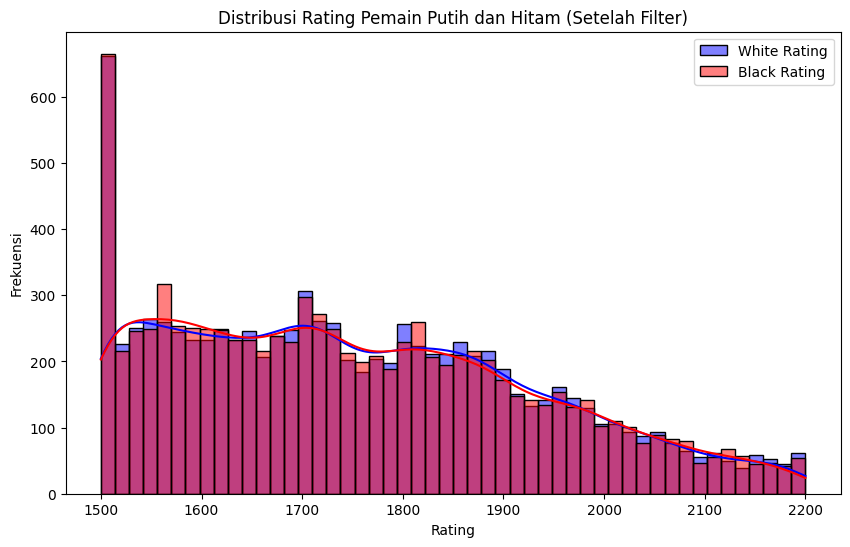

In [13]:
# Visualisasi distribusi rating setelah filter
plt.figure(figsize=(10, 6))
sns.histplot(chess_data['white_rating'], bins=50, kde=True, color='blue', label='White Rating')
sns.histplot(chess_data['black_rating'], bins=50, kde=True, color='red', label='Black Rating')
plt.title('Distribusi Rating Pemain Putih dan Hitam (Setelah Filter)')
plt.xlabel('Rating')
plt.ylabel('Frekuensi')
plt.legend()
plt.show()

## Mengubah opening name menjadi opening archetype

In [14]:
chess_data = (
    chess_data.assign(
        opening_archetype=chess_data.opening_name.map(
            lambda n: n.split(":")[0].split("|")[0].split("#")[0].strip()
        ),
        opening_moves=chess_data.apply(lambda srs: srs['moves'].split(" ")[:srs['opening_ply']],
                                  axis=1)
    )
)

Melihat peermainan yang dimainkan oleh satu pemain setidaknya minimal 2 kali

1946 pemain yang bermain catur setidaknya dua kali.


7824

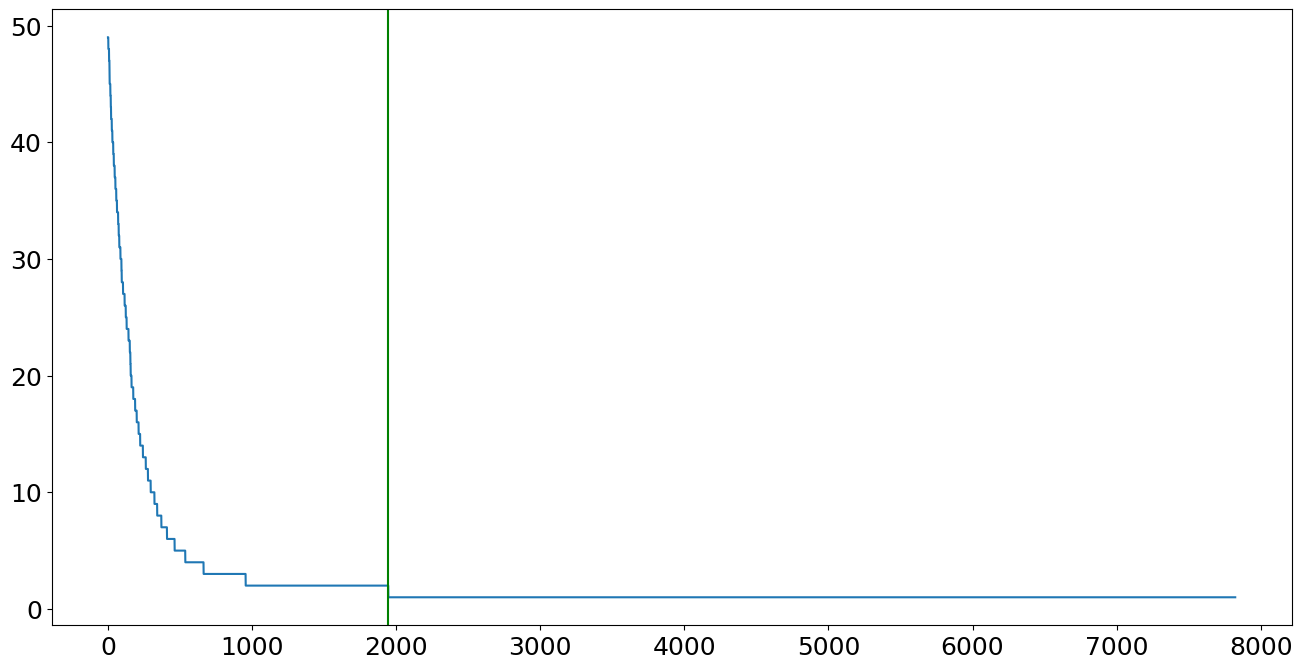

In [15]:
chess_played = pd.concat([chess_data['white_id'], chess_data['black_id']]).value_counts()
chess_played.reset_index(drop=True).plot.line(figsize=(16, 8), fontsize=18)

n_ge_2 = len(chess_played[chess_played > 1])
print(str(n_ge_2) + " pemain yang bermain catur setidaknya dua kali.")

import matplotlib.pyplot as plt
plt.axvline(n_ge_2, color='green')

len(chess_played)

In [16]:
chess_played[chess_played > 1].sum()

12240

In [17]:
opening_used = (
    pd.concat([
        chess_data.groupby('white_id')['opening_archetype'].value_counts(),
        chess_data.groupby('black_id')['opening_archetype'].value_counts()
    ])
    .rename_axis(index=['player_id', 'opening_archetype'])  # Ganti nama indeks dengan list-like
    .reset_index(name='times_used')  # Reset indeks dan beri nama kolom hasil value_counts
    .groupby(['player_id', 'opening_archetype'])['times_used'].sum()  # Jumlahkan times_used
    .reset_index()  # Reset indeks untuk hasil akhir
)

opening_used.head(10)

,player_id,opening_archetype,times_used
0,-l-_jedi_knight_-l-,King's Gambit Accepted,1
1,-l-_jedi_knight_-l-,Scandinavian Defense,1
2,1063314,English Opening,1
3,1063314,Queen's Pawn Game,1
4,1111112222,King's Pawn Game,1
5,1111112222,Pirc Defense,1
6,1111112222,Sicilian Defense,1
7,1240100948,Dutch Defense,2
8,1240100948,Englund Gambit,1
9,1240100948,Horwitz Defense,3


In [18]:
# Menemukan opening_archetype dengan times_used terbanyak untuk setiap player_id
most_used_openings = opening_used.loc[opening_used.groupby('player_id')['times_used'].idxmax()]

# Menampilkan hasil
most_used_openings.head(10)

,player_id,opening_archetype,times_used
0,-l-_jedi_knight_-l-,King's Gambit Accepted,1
2,1063314,English Opening,1
4,1111112222,King's Pawn Game,1
14,1240100948,Queen's Pawn Game,13
18,2700172,Ponziani Opening,2
21,a-devi,Sicilian Defense,1
22,a-mb,Italian Game,1
24,a2520,Sicilian Defense,1
25,a55s72,Rat Defense,1
27,a87144434784,Sicilian Defense,1


In [19]:
opening_used.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13599 entries, 0 to 13598
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   player_id          13599 non-null  object
 1   opening_archetype  13599 non-null  object
 2   times_used         13599 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 318.9+ KB


In [20]:
most_used_openings.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7824 entries, 0 to 13598
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   player_id          7824 non-null   object
 1   opening_archetype  7824 non-null   object
 2   times_used         7824 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 244.5+ KB


In [21]:
result = (
    opening_used
    .reset_index()  # Reset indeks untuk memudahkan manipulasi
    .groupby('opening_archetype')  # Kelompokkan berdasarkan opening_archetype
    .times_used
    .sum()  # Jumlahkan times_used
    .sort_values(ascending=False)  # Urutkan secara menurun
    .to_frame()  # Ubah menjadi DataFrame
    .pipe(lambda df: df.assign(times_used=df.times_used / df.times_used.sum()))  # Hitung proporsi
    .squeeze()  # Ubah menjadi Series
    .head(10)  # Ambil 10 teratas
)

print(result)

opening_archetype
Sicilian Defense           0.161607
French Defense             0.081356
Queen's Pawn Game          0.058395
Italian Game               0.049012
Ruy Lopez                  0.046584
English Opening            0.039077
Caro-Kann Defense          0.034882
Philidor Defense           0.028811
Scandinavian Defense       0.028590
Queen's Gambit Declined    0.027597
Name: times_used, dtype: float64


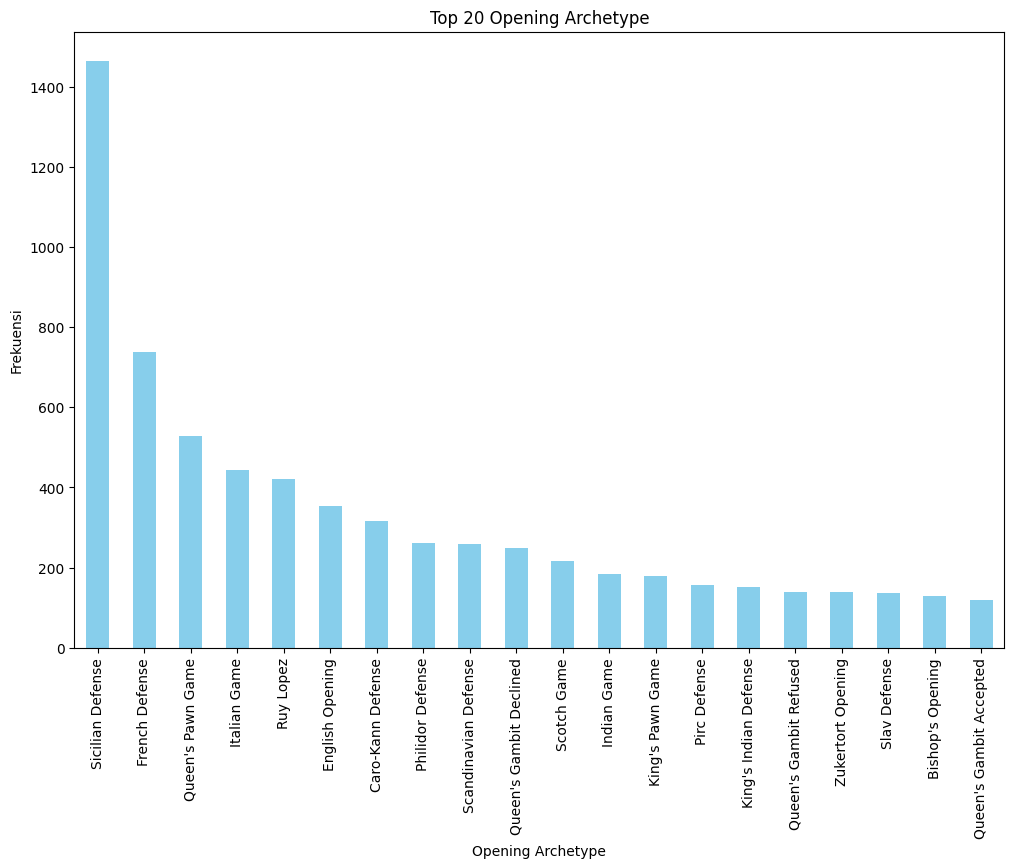

In [22]:
# Visualisasi distribusi opening archetype
plt.figure(figsize=(12, 8))
chess_data['opening_archetype'].value_counts().head(20).plot(kind='bar', color='skyblue')
plt.title('Top 20 Opening Archetype')
plt.xlabel('Opening Archetype')
plt.ylabel('Frekuensi')
plt.show()

## Feature Selection

In [23]:
# Mengonversi data series ‘player_id’ menjadi dalam bentuk list
player_id = opening_used['player_id'].tolist()

# Mengonversi data series ‘opening_archetype’ menjadi dalam bentuk list
opening_archetype = opening_used['opening_archetype'].tolist()

# Mengonversi data series ‘times_used’ menjadi dalam bentuk list
times_used = opening_used['times_used'].tolist()


print(len(player_id))
print(len(opening_archetype))
print(len(times_used))

13599
13599
13599


In [24]:
# Membuat dictionary untuk data ‘resto_id’, ‘resto_name’, dan ‘cuisine’
chess_new = pd.DataFrame({
    'id': player_id,
    'opening_archetype': opening_archetype,
    'times_used': times_used
})
chess_new

,id,opening_archetype,times_used
0,-l-_jedi_knight_-l-,King's Gambit Accepted,1
1,-l-_jedi_knight_-l-,Scandinavian Defense,1
2,1063314,English Opening,1
3,1063314,Queen's Pawn Game,1
4,1111112222,King's Pawn Game,1
...,...,...,...
13594,zzeecco,Blackmar-Diemer Gambit,1
13595,zzeecco,Italian Game,1
13596,zzeecco,Scandinavian Defense,1
13597,zzeljko,King's Pawn Game,1


# Model Development with Content Based Filtering

In [25]:
data = chess_new
data.sample(5)

,id,opening_archetype,times_used
4688,ght1,French Defense,1
13132,xaviergabriel,Nimzowitsch Defense,1
10729,saviter,Nimzowitsch Defense,1
1944,bocadagod,Queen's Pawn Game,3
12939,waki59,Modern Defense,1


## TF-ID Vectorizer

In [26]:
# Inisialisasi
tf = TfidfVectorizer()

tf.fit(data['opening_archetype'].unique())

tf.get_feature_names_out()

array(['accelerated', 'accepted', 'alekhine', 'amar', 'amazon',
       'anderssen', 'attack', 'barnes', 'benko', 'benoni', 'bird',
       'bishop', 'blackmar', 'blumenfeld', 'bogo', 'bononi', 'borg',
       'budapest', 'canard', 'caro', 'carr', 'catalan', 'center',
       'clemenz', 'colle', 'complex', 'countergambit', 'crab', 'crawly',
       'creepy', 'czech', 'danish', 'declined', 'defense', 'diemer',
       'duras', 'dutch', 'east', 'elephant', 'english', 'englund',
       'formation', 'four', 'franco', 'french', 'gambit', 'game',
       'gedult', 'geet', 'george', 'giuoco', 'goldsmith', 'grob',
       'gruenfeld', 'guatemala', 'gunderam', 'hippopotamus', 'horwitz',
       'hungarian', 'indian', 'italian', 'kadas', 'kangaroo', 'kann',
       'king', 'knight', 'knights', 'kruijs', 'larsen', 'latvian',
       'lemming', 'lion', 'london', 'lopez', 'mexican', 'mieses',
       'mikenas', 'modern', 'neo', 'nimzo', 'nimzowitsch', 'old',
       'opening', 'owen', 'paleface', 'pawn', 'petro

In [27]:
# Melakukan fit lalu ditransformasikan ke bentuk matrix
tfidf_matrix = tf.fit_transform(data['opening_archetype'].unique())

# Melihat ukuran matrix tfidf
tfidf_matrix.shape

(136, 123)

In [28]:
# Mengubah vektor tf-idf dalam bentuk matriks dengan fungsi todense()
tfidf_matrix.todense()

matrix([[0.        , 0.64795573, 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ]])

In [29]:
# Membuat dataframe untuk melihat tf-idf matrix
# Kolom diisi dengan jenis masakan
# Baris diisi dengan nama resto

pd.DataFrame(
    tfidf_matrix.todense(),
    columns=tf.get_feature_names_out(),
    index=data.opening_archetype.unique()
).sample(22, axis=1).sample(10, axis=0)

,rubinstein,george,petrov,saragossa,game,richter,borg,vienna,defense,grob,...,king,formation,hungarian,van,london,scandinavian,scotch,indian,italian,accepted
Elephant Gambit,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000
Zukertort Opening,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000
Horwitz Defense,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.358611,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000
Tarrasch Defense,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.358611,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000
Gunderam Defense,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.358611,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000
Queen's Gambit Accepted,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.647956
Bogo-Indian Defense,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.307616,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.513986,0.0,0.000000
Torre Attack,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000
Four Knights Game,0.0,0.0,0.0,0.0,0.443845,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000
Borg Defense,0.0,0.0,0.0,0.0,0.000000,0.0,0.933487,0.0,0.358611,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000


## Cosine Similarity

In [30]:
# Compute cosine similarity
# Menghapus duplikasi dari 'opening_archetype' untuk memastikan keunikan
unique_openings = data['opening_archetype'].drop_duplicates()

cosine_sim = cosine_similarity(tfidf_matrix)
cosine_sim_df = pd.DataFrame(cosine_sim, index=unique_openings, columns=unique_openings)
cosine_sim_df

opening_archetype,King's Gambit Accepted,Scandinavian Defense,English Opening,Queen's Pawn Game,King's Pawn Game,Pirc Defense,Sicilian Defense,Dutch Defense,Englund Gambit,Horwitz Defense,...,Barnes Defense,Hippopotamus Defense,Gunderam Defense,Semi-Bononi,Amar Opening,Valencia Opening,King's Pawn Opening,Lemming Defense,Wade Defense,Slav Indian
opening_archetype,,,,,,,,,,,,,,,,,,,,,
King's Gambit Accepted,1.000000,0.000000,0.000000,0.000000,0.338519,0.000000,0.000000,0.000000,0.241981,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.365565,0.000000,0.000000,0.0
Scandinavian Defense,0.000000,1.000000,0.000000,0.000000,0.000000,0.128602,0.128602,0.128602,0.000000,0.128602,...,0.128602,0.128602,0.128602,0.0,0.000000,0.000000,0.000000,0.128602,0.128602,0.0
English Opening,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.201014,0.201014,0.193121,0.000000,0.000000,0.0
Queen's Pawn Game,0.000000,0.000000,0.000000,1.000000,0.692342,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.432697,0.000000,0.000000,0.0
King's Pawn Game,0.338519,0.000000,0.000000,0.692342,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.764935,0.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Valencia Opening,0.000000,0.000000,0.201014,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.188458,1.000000,0.181058,0.000000,0.000000,0.0
King's Pawn Opening,0.365565,0.000000,0.193121,0.432697,0.764935,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.181058,0.181058,1.000000,0.000000,0.000000,0.0
Lemming Defense,0.000000,0.128602,0.000000,0.000000,0.000000,0.128602,0.128602,0.128602,0.000000,0.128602,...,0.128602,0.128602,0.128602,0.0,0.000000,0.000000,0.000000,1.000000,0.128602,0.0


In [31]:
cosine_sim_df = pd.DataFrame(cosine_sim, index=unique_openings, columns=unique_openings)
print('Shape:', cosine_sim_df.shape)

# Melihat similarity matrix pada setiap resto
cosine_sim_df.sample(5, axis=1).sample(10, axis=0)

Shape: (136, 136)


opening_archetype,Danish Gambit Accepted,Englund Gambit Complex,Canard Opening,Grob Opening,Scotch Gambit
opening_archetype,,,,,
Englund Gambit Declined,0.175377,0.579249,0.000000,0.000000,0.207125
Portuguese Opening,0.000000,0.000000,0.188458,0.188458,0.000000
Hungarian Opening,0.000000,0.000000,0.188458,0.188458,0.000000
System,0.000000,0.000000,0.000000,0.000000,0.000000
Polish Defense,0.000000,0.000000,0.000000,0.000000,0.000000
Van't Kruijs Opening,0.000000,0.000000,0.144946,0.144946,0.000000
Nimzo-Larsen Attack,0.000000,0.000000,0.000000,0.000000,0.000000
Mikenas Defense,0.000000,0.000000,0.000000,0.000000,0.000000
Ruy Lopez,0.000000,0.000000,0.000000,0.000000,0.000000


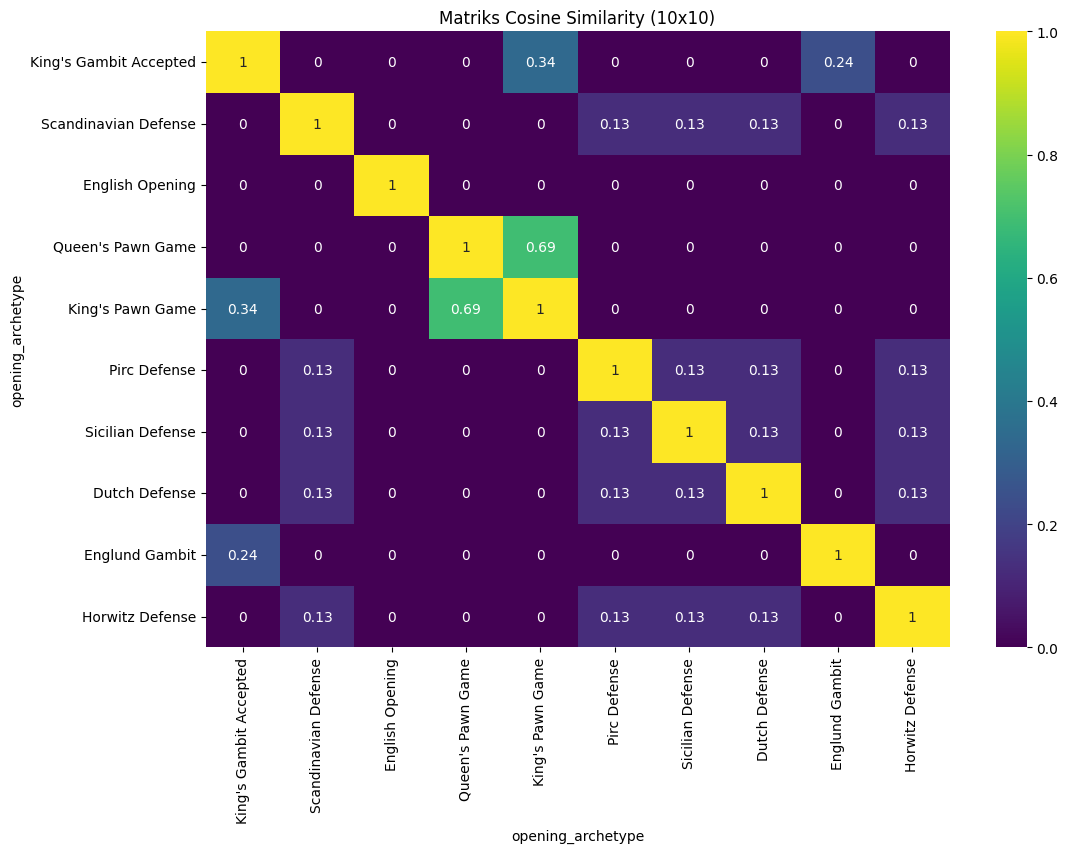

In [32]:
# Visualisasi matriks cosine similarity
plt.figure(figsize=(12, 8))
sns.heatmap(cosine_sim_df.iloc[:10, :10], cmap='viridis', annot=True)
plt.title('Matriks Cosine Similarity (10x10)')
plt.show()

In [33]:
def opening_recommendations(player_id, k=5):

    # Find all openings used by the player
    player_preferences = data[data['id'] == player_id]

    if player_preferences.empty:
        print(f"No player data found for '{player_id}'.")
        return []

    used_openings = player_preferences['opening_archetype'].unique().tolist()

    # Daftar opening yang belum digunakan oleh pengguna
    opening_not_used = [opening for opening in data['opening_archetype'].unique() if opening not in used_openings]

    # Gabungkan opening yang sudah dan belum digunakan tanpa duplikasi
    all_openings = list(set(used_openings + opening_not_used))

    recommendations = []

    for opening in all_openings:
        # Calculate similarity using cosine similarity matrix
        similarity_scores = []
        for player_opening in used_openings:
            if player_opening in cosine_sim_df.index and opening in cosine_sim_df.columns:
                similarity_scores.append(cosine_sim_df.loc[player_opening, opening])

        if similarity_scores:
            avg_similarity = np.mean(similarity_scores)
            recommendations.append((opening, avg_similarity))

    recommendations.sort(key=lambda x: x[1], reverse=True)

    # Return top k recommendations (including used ones)
    return [rec[0] for rec in recommendations[:k]]

In [34]:
data[data.id.eq('yesman81')]

,id,opening_archetype,times_used
13284,yesman81,French Defense,1
13285,yesman81,Ruy Lopez,1


In [35]:
# Example usage
player_id = 'yesman81'
print(f"\nRekomendasi opening catur untuk user {player_id}:")
recommended_openings = opening_recommendations(player_id)

for opening in recommended_openings:
    print(opening)


Rekomendasi opening catur untuk user yesman81:
Ruy Lopez
French Defense
Benoni Defense
Slav Defense
Gruenfeld Defense


## Evaluasi Precision untuk Content Based Filtering

In [45]:
def precision_at_k(recommended, relevant, k=5):
    """
    Calculate Precision@K.

    :param recommended: List of recommended items.
    :param relevant: List of relevant items.
    :param k: Number of recommendations to consider.
    :return: Precision@K score.
    """
    recommended_at_k = recommended[:k]  # Ambil top-K rekomendasi
    relevant_set = set(relevant)  # Ubah ke set untuk pencarian yang lebih cepat
    hits = sum(1 for item in recommended_at_k if item in relevant_set)  # Hitung item yang relevan
    return hits / k  # Hitung Precision@K

In [48]:
# Contoh penggunaan
player_id = 'yesman81'  # Ganti dengan ID pemain yang valid
# k = 5  # Jumlah rekomendasi

# Dapatkan rekomendasi
recommended_openings = opening_recommendations(player_id)

# Tentukan opening yang relevan (dalam hal ini, opening yang sudah digunakan oleh pemain)
player_preferences = data[data['id'] == player_id]
relevant_openings = player_preferences['opening_archetype'].unique().tolist()

# Hitung Precision@K
precision = precision_at_k(recommended_openings, relevant_openings)
print(f"Precision: {precision:.4f}")

Precision: 0.4000


# Model Development with Collaborative Filtering

## Encode User dan Opening

In [36]:
# Encode user_id
user_ids = data['id'].unique().tolist()
user_to_user_encoded = {x: i for i, x in enumerate(user_ids)}
user_encoded_to_user = {i: x for i, x in enumerate(user_ids)}

# Encode opening_archetype
opening_ids = data['opening_archetype'].unique().tolist()
opening_to_opening_encoded = {x: i for i, x in enumerate(opening_ids)}
opening_encoded_to_opening = {i: x for i, x in enumerate(opening_ids)}

# Mapping ke dataset
data['user'] = data['id'].map(user_to_user_encoded)
data['opening'] = data['opening_archetype'].map(opening_to_opening_encoded)

## Normalisasi Rating

In [37]:
# Normalisasi times_used ke skala 0-1
min_rating = min(data['times_used'])
max_rating = max(data['times_used'])
data['rating'] = data['times_used'].apply(lambda x: (x - min_rating) / (max_rating - min_rating))

## Membagi Data untuk Training dan Validasi

In [38]:
# Acak dataset
data = data.sample(frac=1, random_state=42)

# Membagi data
x = data[['user', 'opening']].values
y = data['rating'].values

train_indices = int(0.8 * len(data))
x_train, x_val, y_train, y_val = (
    x[:train_indices],
    x[train_indices:],
    y[:train_indices],
    y[train_indices:]
)

# Tampilkan hasil
print("Data Training:")
print(x_train, y_train)

print("\nData Validasi:")
print(x_val, y_val)

Data Training:
[[2070   12]
 [6970    1]
 [ 101    6]
 ...
 [7482   80]
 [3238    3]
 [3122    6]] [0.         0.         0.61904762 ... 0.         0.         0.        ]

Data Validasi:
[[2599   76]
 [5770    6]
 [ 216    9]
 ...
 [3154    3]
 [ 515   60]
 [4194  112]] [0. 0. 0. ... 0. 0. 0.]


## Proses Training

In [39]:
class ChessRecommenderNet(tf_lib.keras.Model):
    def __init__(self, num_users, num_openings, embedding_size, **kwargs):
        super(ChessRecommenderNet, self).__init__(**kwargs)
        self.num_users = num_users
        self.num_openings = num_openings
        self.embedding_size = embedding_size
        self.user_embedding = layers.Embedding(
            num_users,
            embedding_size,
            embeddings_initializer='he_normal',
            embeddings_regularizer=keras.regularizers.l2(1e-6)
        )
        self.user_bias = layers.Embedding(num_users, 1)
        self.opening_embedding = layers.Embedding(
            num_openings,
            embedding_size,
            embeddings_initializer='he_normal',
            embeddings_regularizer=keras.regularizers.l2(1e-6)
        )
        self.opening_bias = layers.Embedding(num_openings, 1)

    def call(self, inputs):
        user_vector = self.user_embedding(inputs[:, 0])
        user_bias = self.user_bias(inputs[:, 0])
        opening_vector = self.opening_embedding(inputs[:, 1])
        opening_bias = self.opening_bias(inputs[:, 1])

        dot_user_opening = tf_lib.tensordot(user_vector, opening_vector, 2)
        x = dot_user_opening + user_bias + opening_bias

        return tf_lib.nn.sigmoid(x)

# Inisialisasi model
num_users = len(user_to_user_encoded)
num_openings = len(opening_to_opening_encoded)
model = ChessRecommenderNet(num_users, num_openings, 50)

# Compile model
model.compile(
    loss=tf_lib.keras.losses.BinaryCrossentropy(),
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    metrics=[tf_lib.keras.metrics.RootMeanSquaredError()]
)

# Training model
history = model.fit(
    x=x_train,
    y=y_train,
    batch_size=32,
    epochs=100,
    validation_data=(x_val, y_val)
)

Epoch 1/100
340/340 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - loss: 0.6479 - root_mean_squared_error: 0.4638 - val_loss: 0.4871 - val_root_mean_squared_error: 0.3712
Epoch 2/100
340/340 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - loss: 0.1341 - root_mean_squared_error: 0.1027 - val_loss: 0.3767 - val_root_mean_squared_error: 0.2977
Epoch 3/100
340/340 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 0.0887 - root_mean_squared_error: 0.0658 - val_loss: 0.3568 - val_root_mean_squared_error: 0.2834
Epoch 4/100
340/340 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 0.0846 - root_mean_squared_error: 0.0625 - val_loss: 0.3573 - val_root_mean_squared_error: 0.2835
Epoch 5/100
340/340 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - loss: 0.0832 - root_mean_squared_error: 0.0629 - val_loss: 0.3616 - val_root_mean_squared_error: 0.2864
Epoch 6/100
340/340 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.0836 - root_mean_squared_error: 0.0643 - val_loss: 0.3622 - val_root_mean_squared_error: 0.2867
Epoch 7/100
340/340 ━━━━━━━━━━━━━━━━━━━━ 3s 

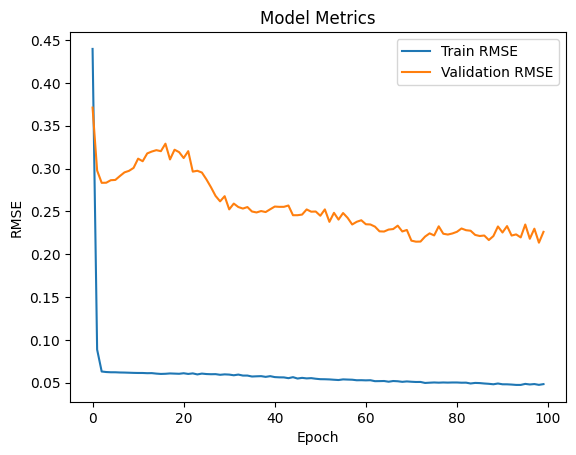

In [40]:
# Plot RMSE
plt.plot(history.history['root_mean_squared_error'], label='Train RMSE')
plt.plot(history.history['val_root_mean_squared_error'], label='Validation RMSE')
plt.title('Model Metrics')
plt.ylabel('RMSE')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [41]:
def get_opening_recommendations(user_id, top_k=5):
    # Daftar opening yang sudah digunakan oleh pengguna
    opening_used_by_user = data[data['user'] == user_to_user_encoded[user_id]]['opening']

    # Daftar opening yang belum digunakan oleh pengguna
    opening_not_used = [opening for opening in range(num_openings) if opening not in opening_used_by_user]

    # Gabungkan opening yang sudah digunakan dan yang belum digunakan tanpa duplikasi
    all_openings = list(set(opening_used_by_user.tolist() + opening_not_used))

    # Buat input untuk model
    user_encoder = user_to_user_encoded[user_id]
    user_opening_array = np.array([[user_encoder, opening] for opening in all_openings])

    # Cek jika user_opening_array kosong
    if user_opening_array.size == 0:
        print(f"No openings available for user {user_id}.")
        return

    # Prediksi rating untuk semua opening yang relevan
    ratings = model.predict(user_opening_array).flatten()

    # Ambil indeks top-k dari rating tertinggi
    top_ratings_indices = ratings.argsort()[-top_k:][::-1]

    # Mendapatkan rekomendasi berdasarkan top rating
    recommended_opening_ids = [all_openings[i] for i in top_ratings_indices]
    recommended_openings = [opening_encoded_to_opening[opening_id] for opening_id in recommended_opening_ids]

    print(f"Rekomendasi opening catur untuk user {user_id}:")
    for opening in recommended_openings:
        print(opening)

# Contoh penggunaan
get_opening_recommendations('yesman81')


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
Rekomendasi opening catur untuk user yesman81:
Sicilian Defense
French Defense
Mieses Opening
Italian Game
Queen's Pawn Game


## Evaluasi RMSE untuk Collaborative Filtering




In [49]:
# Evaluasi model pada data validasi
val_loss, val_rmse = model.evaluate(x_val, y_val, batch_size=32)
loss, rmse = model.evaluate(x_train, y_train, batch_size=32)

print(f"Validation Loss: {round(val_loss, 4)}")
print(f"Validation RMSE: {round(val_rmse, 4)}")
print(f"Loss: {round(loss, 4)}")
print(f"RMSE: {round(rmse, 4)}")

85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2333 - root_mean_squared_error: 0.2204
340/340 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0610 - root_mean_squared_error: 0.0469
Validation Loss: 0.2441
Validation RMSE: 0.2261
Loss: 0.0602
RMSE: 0.0463
